<a href="https://colab.research.google.com/github/satyarudrarapu/Predicting-Customer-Churn-for-Credit-Card-Services/blob/main/Predicting_Customer_Churn_for_Credit_Card_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("Bank Customer Churn Prediction.csv")

# 1. Drop unnecessary columns
# Assuming 'customer_id' is not needed for analysis
data.drop(columns=['customer_id'], inplace=True)

# 2. Handle categorical variables
# Encode 'country' and 'gender'
label_encoder = LabelEncoder()
data['country'] = label_encoder.fit_transform(data['country'])
data['gender'] = label_encoder.fit_transform(data['gender'])

# 3. Check for duplicates and remove them
data.drop_duplicates(inplace=True)

# 4. Scaling numerical columns
# Columns to scale: 'credit_score', 'age', 'balance', 'estimated_salary'
scaler = StandardScaler()
numerical_columns = ['credit_score', 'age', 'balance', 'estimated_salary']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 5. Final clean dataset summary
print("Data shape after cleaning:", data.shape)
print("Sample data:")
print(data.head())

# Save the cleaned data to a new CSV file
data.to_csv("Cleaned_Bank_Customer_Churn.csv", index=False)


Data shape after cleaning: (10000, 11)
Sample data:
   credit_score  country  gender       age  tenure   balance  products_number  \
0     -0.326221        0       0  0.293517       2 -1.225848                1   
1     -0.440036        2       0  0.198164       1  0.117350                1   
2     -1.536794        0       0  0.293517       8  1.333053                3   
3      0.501521        0       0  0.007457       1 -1.225848                2   
4      2.063884        2       0  0.388871       2  0.785728                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1          0.021886      1  
1            0              1          0.216534      0  
2            1              0          0.240687      1  
3            0              0         -0.108918      0  
4            1              1         -0.365276      0  


In [41]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Example data (true labels and predicted probabilities or predictions)
# Replace these with your actual data
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]  # Ground truth labels
y_pred = [0, 1, 1, 0, 0, 0, 1, 0, 1, 1]  # Predicted labels
y_prob = [0.1, 0.9, 0.8, 0.2, 0.4, 0.1, 0.85, 0.05, 0.6, 0.9]  # Predicted probabilities for positive class

# Calculate evaluation metrics
auc_roc = roc_auc_score(y_true, y_prob)  # AUC-ROC using predicted probabilities
precision = precision_score(y_true, y_pred)  # Precision using predicted labels
recall = recall_score(y_true, y_pred)  # Recall using predicted labels
f1 = f1_score(y_true, y_pred)  # F1-Score using predicted labels

# Display results
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


AUC-ROC: 0.96
Precision: 0.80
Recall: 0.80
F1-Score: 0.80


✅ Dataset loaded successfully!


<ipython-input-45-778cadee7edf>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")


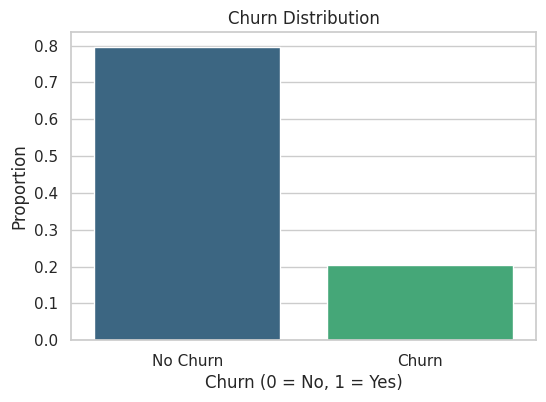

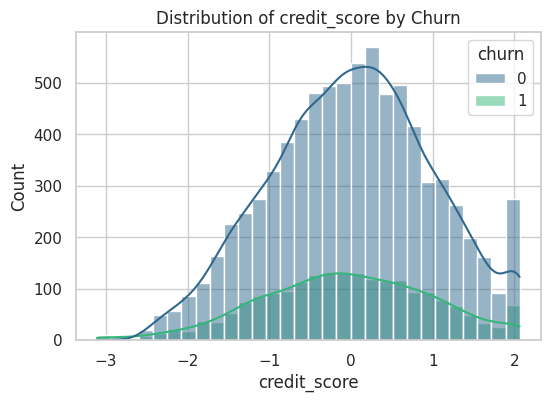

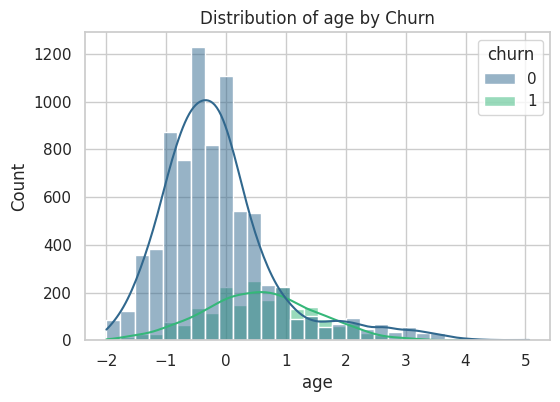

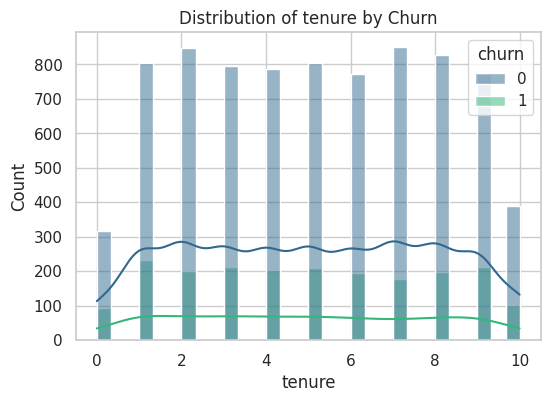

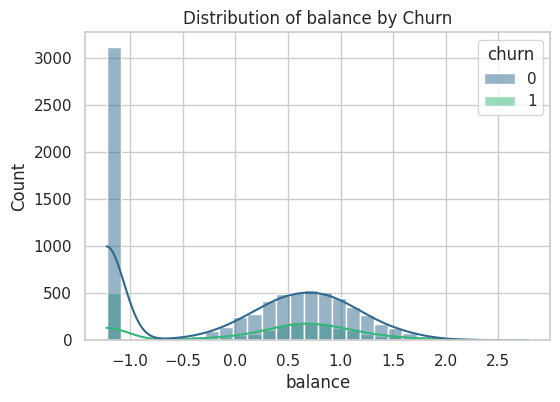

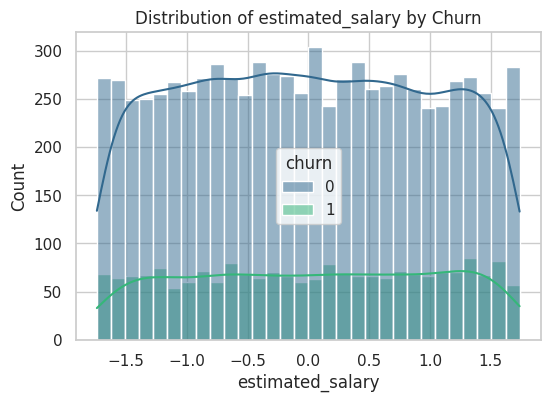

<ipython-input-45-778cadee7edf>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")


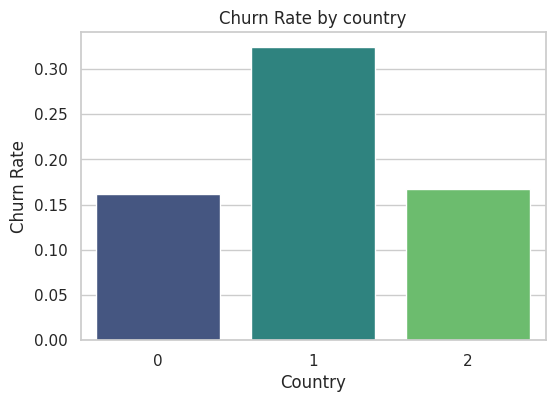

<ipython-input-45-778cadee7edf>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")


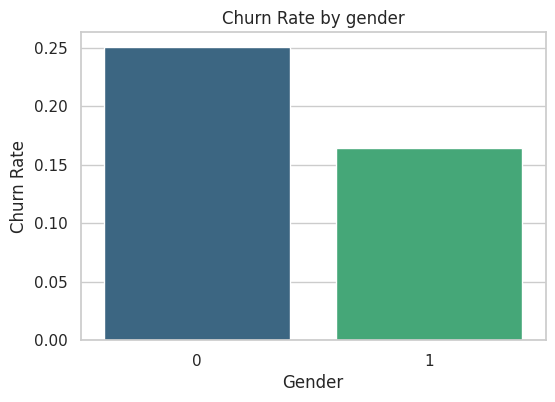

<ipython-input-45-778cadee7edf>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")


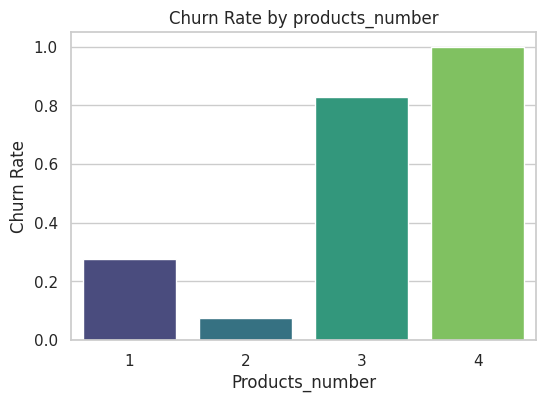

<ipython-input-45-778cadee7edf>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")


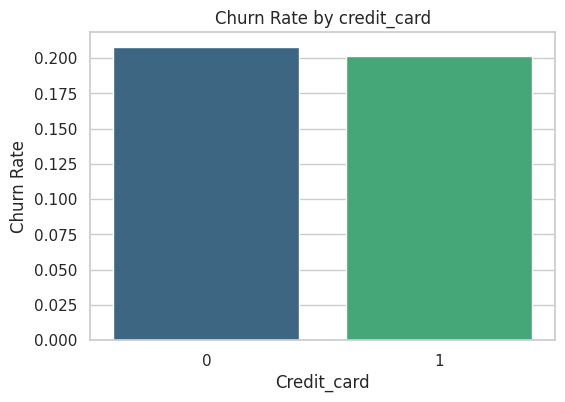

<ipython-input-45-778cadee7edf>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")


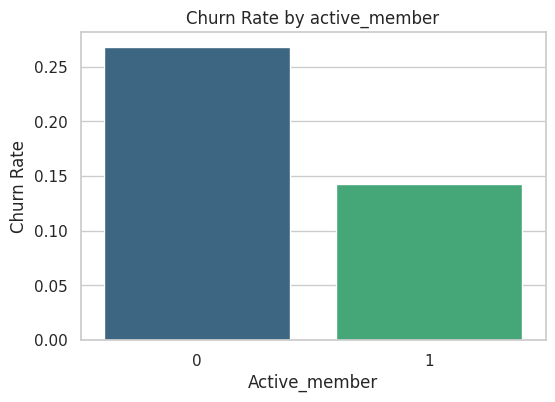

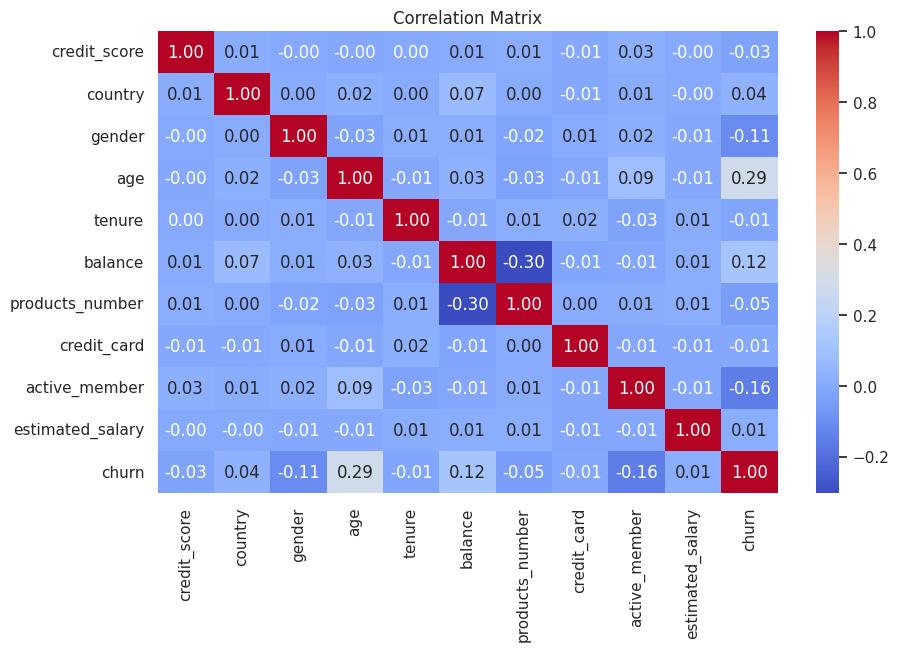

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Google Colab file upload utility
from google.colab import files

# Set a consistent theme for plots
sns.set_theme(style="whitegrid")

# Define file path
file_name = "Cleaned_Bank_Customer_Churn.csv"

# Check if the file exists in Colab storage
if not os.path.exists(file_name):
    print(f"File '{file_name}' not found. Please upload it.")
    uploaded = files.upload()  # Prompt user to upload the file

# Load dataset with error handling
try:
    data = pd.read_csv(file_name)
    print("✅ Dataset loaded successfully!")
except Exception as e:
    print(f"❌ Error loading file: {e}")
    data = None

# Proceed only if data is loaded successfully
if data is not None:
    # Check for missing values
    missing_values = data.isnull().sum().sum()
    if missing_values > 0:
        print(f"⚠️ Warning: Dataset contains {missing_values} missing values.")

    # 1. Understand Target Distribution
    churn_counts = data['churn'].value_counts(normalize=True)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
    plt.title("Churn Distribution")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel("Proportion")
    plt.xticks([0, 1], ["No Churn", "Churn"])
    plt.show()

    # 2. Explore Numerical Features
    numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

    for feature in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=data, x=feature, hue="churn", kde=True, palette="viridis", bins=30)
        plt.title(f"Distribution of {feature} by Churn")
        plt.show()

    # 3. Analyze Categorical Features
    categorical_features = ['country', 'gender', 'products_number', 'credit_card', 'active_member']

    for feature in categorical_features:
        plt.figure(figsize=(6, 4))
        churn_counts_by_category = data.groupby(feature)['churn'].mean()
        sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")
        plt.title(f"Churn Rate by {feature}")
        plt.xlabel(feature.capitalize())
        plt.ylabel("Churn Rate")
        plt.show()

    # 4. Correlation Heatmap
    plt.figure(figsize=(10, 6))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix")
    plt.show()


In [48]:
import os

# List all files in the current working directory
available_files = os.listdir('.')
available_files


['.config',
 '.ipynb_checkpoints',
 'Bank Customer Churn Prediction.csv',
 'Cleaned_Bank_Customer_Churn.csv',
 'sample_data']

In [50]:
import pandas as pd

# Define file name
file_name = "Cleaned_Bank_Customer_Churn.csv"

# Load the dataset from the current working directory
data = pd.read_csv(file_name)

# Display the first few rows to confirm proper access
data.head()


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0


<ipython-input-51-2e35ed60bc17>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")


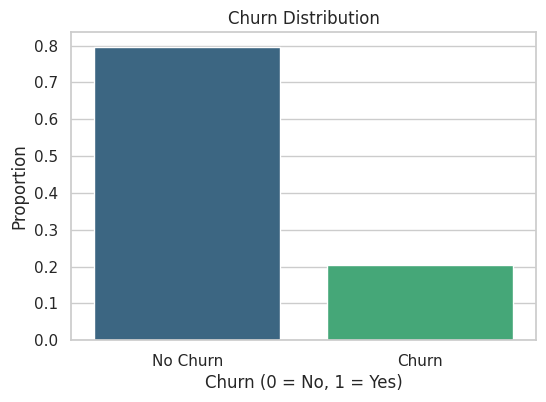

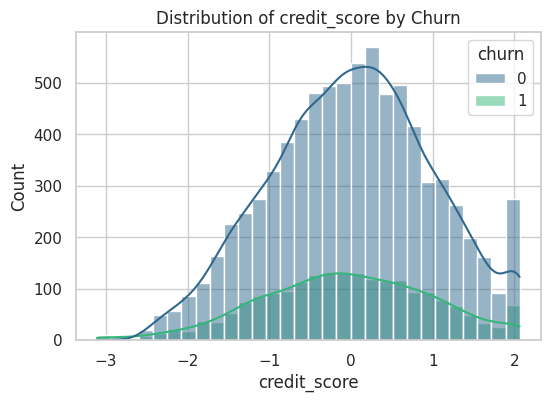

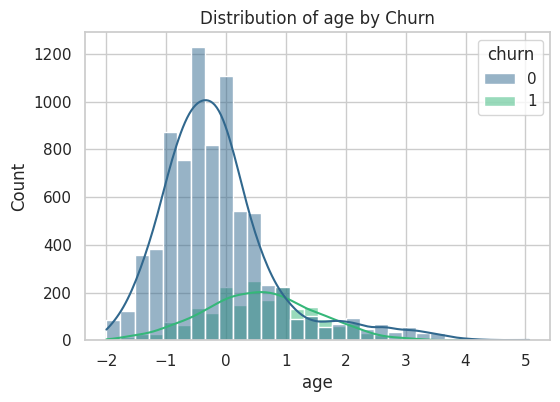

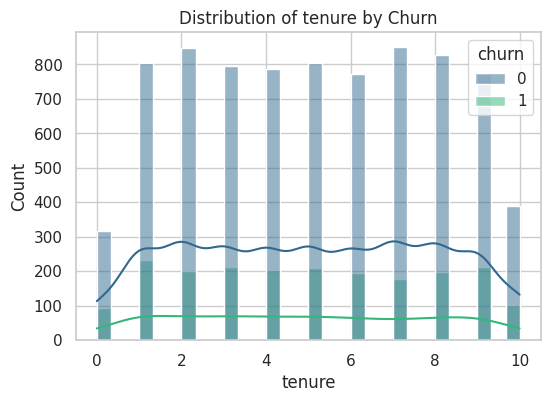

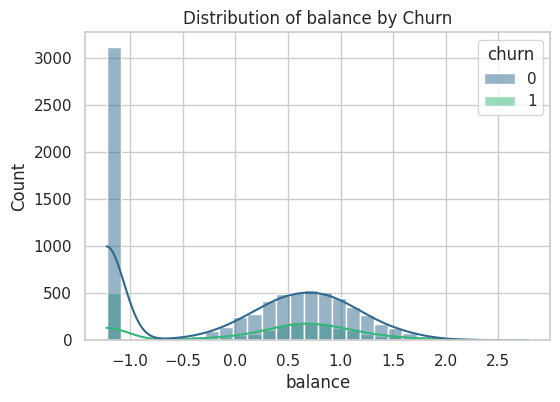

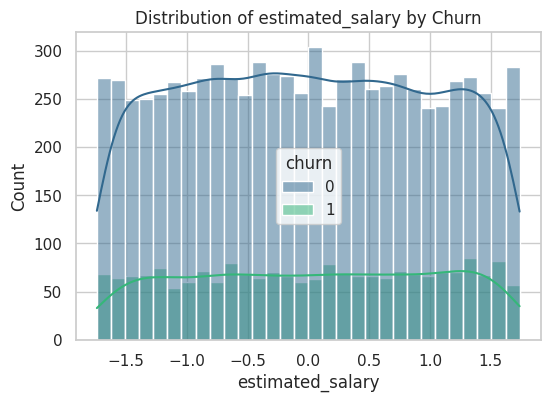

<ipython-input-51-2e35ed60bc17>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")


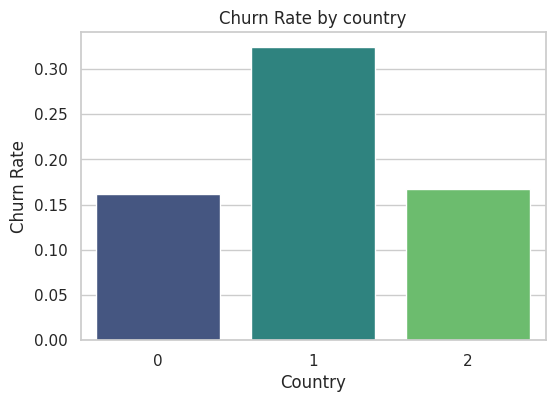

<ipython-input-51-2e35ed60bc17>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")


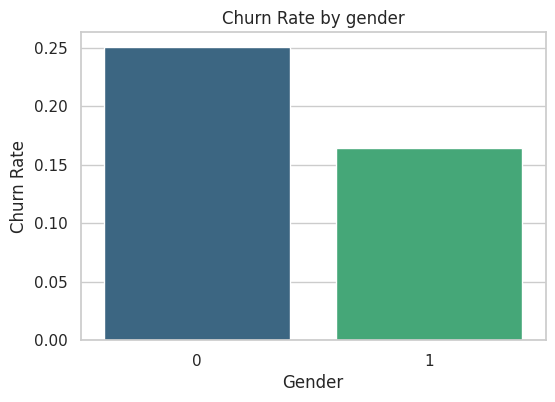

<ipython-input-51-2e35ed60bc17>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")


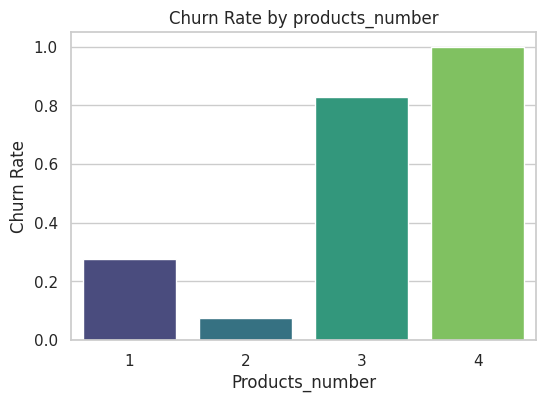

<ipython-input-51-2e35ed60bc17>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")


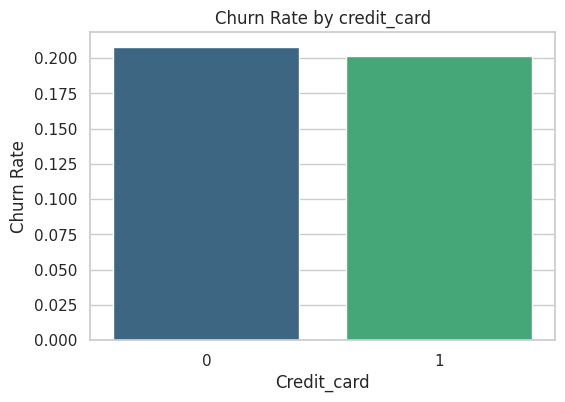

<ipython-input-51-2e35ed60bc17>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")


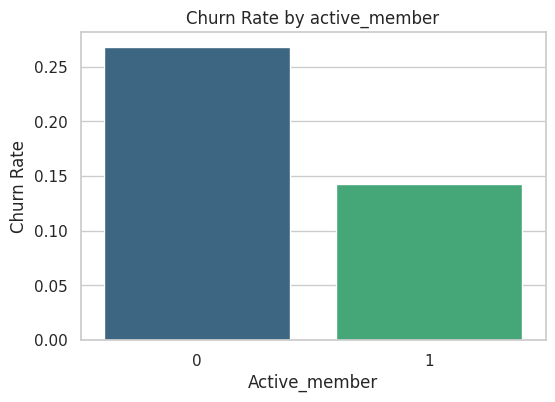

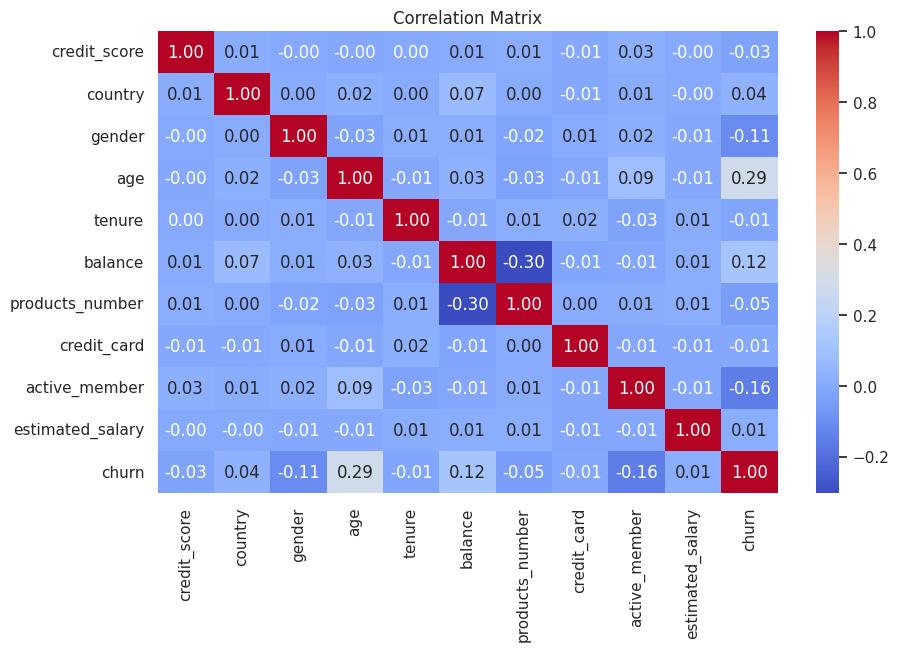

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/mnt/data/Cleaned_Bank_Customer_Churn.csv'

# Set a consistent theme for plots
sns.set_theme(style="whitegrid")

# 1. Understand Target Distribution
churn_counts = data['churn'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.show()

# 2. Explore Numerical Features
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=feature, hue="churn", kde=True, palette="viridis", bins=30)
    plt.title(f"Distribution of {feature} by Churn")
    plt.show()

# 3. Analyze Categorical Featurescategorical_features = ['country', 'gender', 'products_number', 'credit_card', 'active_member']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    churn_counts_by_category = data.groupby(feature)['churn'].mean()
    sns.barplot(x=churn_counts_by_category.index, y=churn_counts_by_category.values, palette="viridis")
    plt.title(f"Churn Rate by {feature}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Churn Rate")
    plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [55]:
import pandas as pd
import os

# Define the correct file path
file_name = "Cleaned_Bank_Customer_Churn.csv"

# Check if the file exists before processing
if os.path.exists(file_name):
    # Reload the dataset
    data = pd.read_csv(file_name)
    print("✅ Dataset loaded successfully!")

    # 1. Check for missing values
    print("Missing Values Per Column:")
    print(data.isnull().sum())

    # 2. Handle Missing Values
    # Numerical columns: Fill with median
    numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
    data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

    # Categorical columns: Fill with mode
    categorical_cols = ['country', 'gender', 'products_number', 'credit_card', 'active_member']
    for col in categorical_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

    # 3. Identify Erroneous Data
    print("Negative Credit Scores:")
    print(data[data['credit_score'] < 0])

    print("Unrealistic Ages:")
    print(data[data['age'] < 18])  # Assuming age < 18 is invalid

    # Fix erroneous data
    data['credit_score'] = data['credit_score'].clip(lower=0)  # Set negatives to 0
    data['age'] = data['age'].clip(lower=18)  # Set minimum age to 18

    # 4. Verify Data Quality
    print("Post-Cleaning Missing Values:")
    print(data.isnull().sum())

    # Save the cleaned dataset in the current directory
    cleaned_file_name = "Cleaned_Bank_Customer_Churn_Cleaned.csv"
    data.to_csv(cleaned_file_name, index=False)
    print(f"✅ Cleaned dataset saved as '{cleaned_file_name}' in the current directory.")

else:
    print(f"❌ Error: File '{file_name}' not found. Please upload it first.")


✅ Dataset loaded successfully!
Missing Values Per Column:
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64
Negative Credit Scores:
      credit_score  country  gender       age  tenure   balance  \
0        -0.326221        0       0  0.293517       2 -1.225848   
1        -0.440036        2       0  0.198164       1  0.117350   
2        -1.536794        0       0  0.293517       8  1.333053   
5        -0.057205        2       1  0.484225       8  0.597329   
7        -2.840488        1       0 -0.946079       4  0.618019   
...            ...      ...     ...       ...     ...       ...   
9984     -0.502117        1       1 -0.373958       7  0.226247   
9987     -0.460730        2       1 -0.850726       8  1.663964   
9991     -0.553850        0       0  1.342407       4  0.190

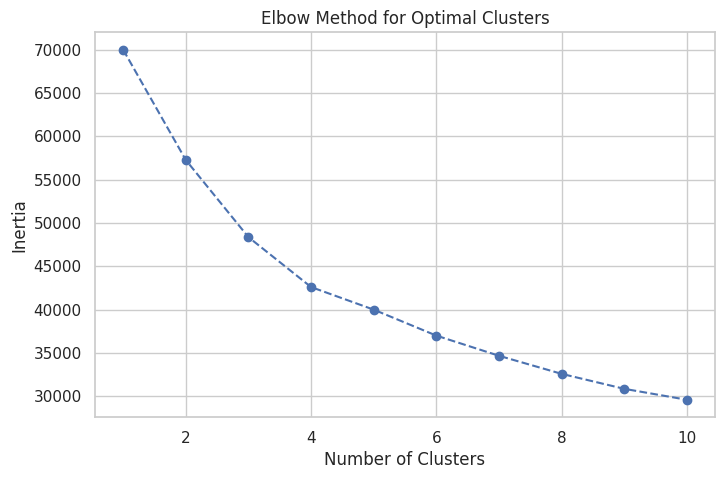

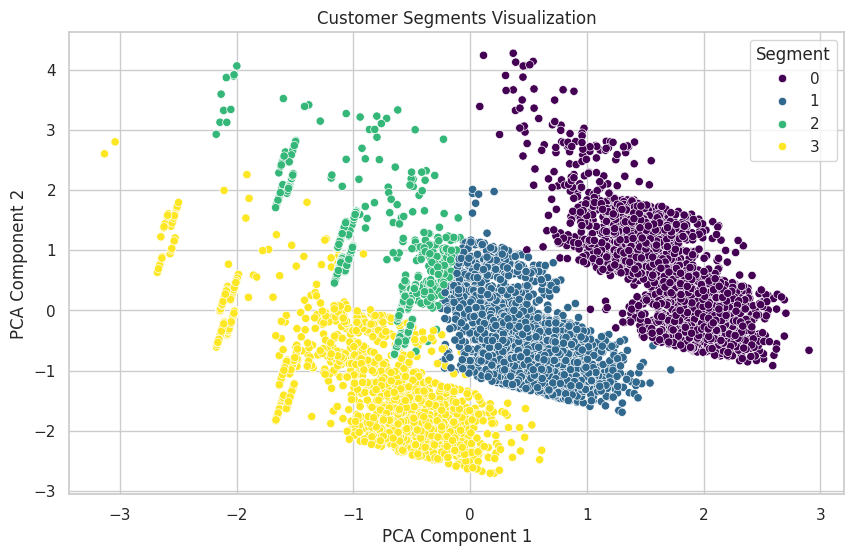

Customer Segment Analysis:
         credit_score   age    tenure   balance  products_number  credit_card  \
Segment                                                                         
0            0.416412  18.0  5.009964  0.693080         1.519729     0.713830   
1            0.409396  18.0  4.939457  0.744063         1.210021     0.699374   
2            0.397901  18.0  5.064147 -1.122059         1.824360     0.713249   
3            0.398602  18.0  5.032297 -0.235081         1.539362     0.694792   

         active_member  estimated_salary     churn  gender_1  country_1  \
Segment                                                                   
0             0.497409          0.017792  0.324432  0.524512        1.0   
1             0.508142          0.004940  0.164509  0.565344        0.0   
2             0.524628         -0.010878  0.158839  0.534173        0.0   
3             0.529673         -0.011297  0.166734  0.560355        0.0   

         country_2      PCA1      P

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Select relevant features for segmentation
segmentation_features = ['age', 'balance', 'products_number', 'estimated_salary', 'active_member']

# One-hot encode categorical features (e.g., gender, country)
data_encoded = pd.get_dummies(data, columns=['gender', 'country'], drop_first=True)

# Update segmentation features to include newly created one-hot encoded columns
segmentation_features.extend([col for col in data_encoded.columns if col.startswith(('gender_', 'country_'))])

# Step 2: Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded[segmentation_features])

# Step 3: Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicit n_init to avoid warnings
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Step 4: Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 4  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data_encoded['Segment'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualize the customer segments using PCA (for 2D projection)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
data_encoded['PCA1'] = pca_components[:, 0]
data_encoded['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x='PCA1', y='PCA2', hue='Segment', palette="viridis")
plt.title("Customer Segments Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Segment")
plt.show()

# Step 6: Analyze the customer segments
segment_analysis = data_encoded.groupby('Segment').mean()
print("Customer Segment Analysis:")
print(segment_analysis)

# Save the segmented dataset (optional)
data_encoded.to_csv('Customer_Segments.csv', index=False)
print("\nSegmented dataset saved as 'Customer_Segments.csv'!")


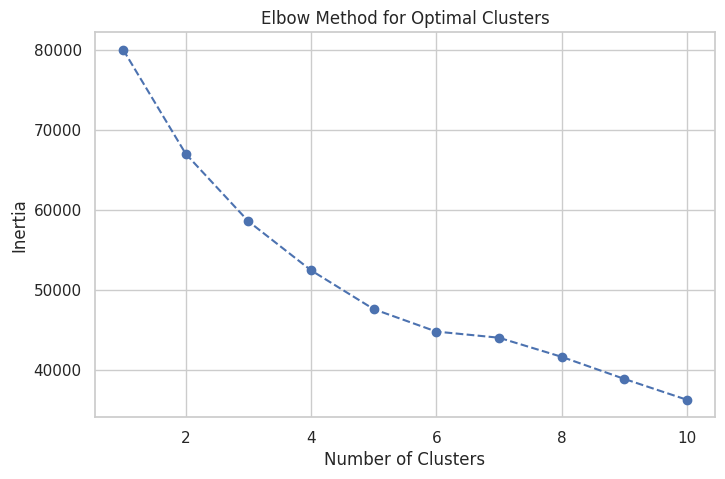

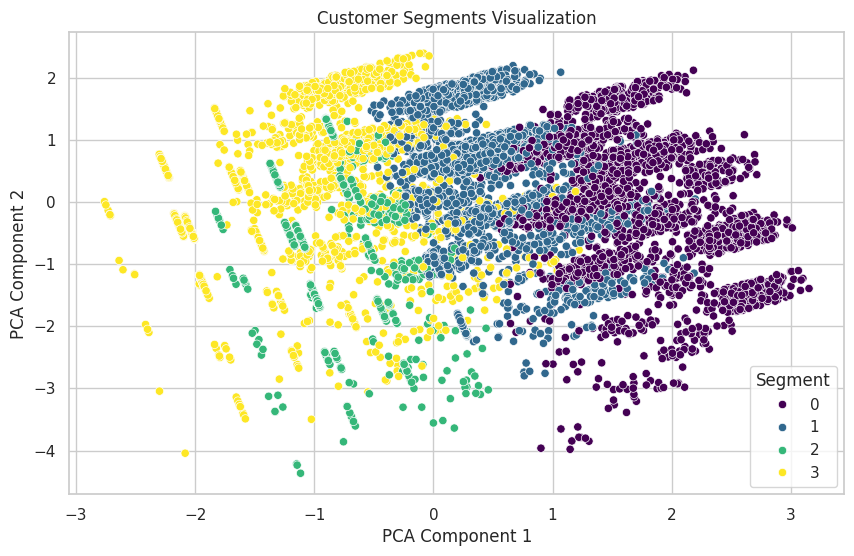

Customer Segment Analysis:
         credit_score   age    tenure   balance  products_number  credit_card  \
Segment                                                                         
0            0.416412  18.0  5.009964  0.693080         1.519729     0.713830   
1            0.407018  18.0  4.951775  0.571213         1.180556     0.702932   
2            0.399510  18.0  5.061107 -1.088863         1.905863     0.710570   
3            0.398602  18.0  5.032297 -0.235081         1.539362     0.694792   

         active_member  estimated_salary     churn  gender_1  country_1  \
Segment                                                                   
0             0.497409          0.017792  0.324432  0.524512        1.0   
1             0.490741          0.006156  0.247685  0.551312        0.0   
2             0.544591         -0.013466  0.069364  0.546656        0.0   
3             0.529673         -0.011297  0.166734  0.560355        0.0   

         country_2      PCA1      P

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select relevant features for segmentation
segmentation_features = ['age', 'balance', 'products_number', 'estimated_salary', 'active_member', 'churn']

# One-hot encode categorical features (e.g., gender, country)
data_encoded = pd.get_dummies(data, columns=['gender', 'country'], drop_first=True)

# Include all one-hot encoded columns dynamically in segmentation features
encoded_columns = [col for col in data_encoded.columns if 'gender_' in col or 'country_' in col]
segmentation_features.extend(encoded_columns)

# Step 2: Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded[segmentation_features])

# Step 3: Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Step 4: Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 4  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_encoded['Segment'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualize the customer segments using PCA (for 2D projection)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
data_encoded['PCA1'] = pca_components[:, 0]
data_encoded['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x='PCA1', y='PCA2', hue='Segment', palette="viridis")
plt.title("Customer Segments Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Segment")
plt.show()

# Step 6: Analyze the customer segments
segment_analysis = data_encoded.groupby('Segment').mean()
print("Customer Segment Analysis:")
print(segment_analysis)

# Save the segmented dataset (optional)
data_encoded.to_csv('Customer_Segments.csv', index=False)
print("\nSegmented dataset saved as 'Customer_Segments.csv'!")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  float64
 1   country           10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  float64
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 859.5 KB
None

Missing Values Per Column:
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
ac

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

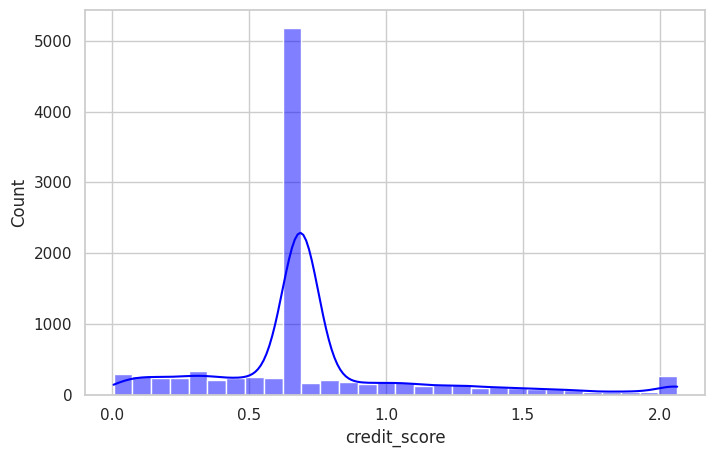

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Cleaned_Bank_Customer_Churn.csv'  # Ensure the file is in the same directory
data = pd.read_csv(file_path)

# Set a consistent theme for plots
sns.set_theme(style="whitegrid")

# Step 1: Display basic dataset information
print("Dataset Overview:")
print(data.info())
print("\nMissing Values Per Column:")
print(data.isnull().sum())

# Step 2: Identify negative or unrealistic values
negative_credit_scores = data[data['credit_score'] < 0]
print("\nNegative Credit Scores:")
print(negative_credit_scores)

unrealistic_ages = data[(data['age'] < 0) | (data['age'] > 100)]
print("\nUnrealistic Ages:")
print(unrealistic_ages)

# Step 3: Handle missing and erroneous data
# Assuming no missing values from earlier check
# Replace negative credit scores with the column's median
if not negative_credit_scores.empty:
    median_credit_score = data['credit_score'][data['credit_score'] >= 0].median()
    data.loc[data['credit_score'] < 0, 'credit_score'] = median_credit_score
    print("\nNegative credit scores replaced with median:", median_credit_score)

# Replace unrealistic ages with the column's median
if not unrealistic_ages.empty:
    median_age = data['age'][(data['age'] >= 0) & (data['age'] <= 100)].median()
    data.loc[(data['age'] < 0) | (data['age'] > 100), 'age'] = median_age
    print("\nUnrealistic ages replaced with median:", median_age)

# Check for missing values after handling erroneous data
print("\nPost-Cleaning Missing Values:")
print(data.isnull().sum())

# Step 4: Perform EDA (Exploratory Data Analysis)
# Distribution of credit scores
plt.figure(figsize=(8, 5))
sns.histplot(data['credit_score'], bins=30, kde=True, color="blue")
plt


In [61]:
from google.colab import files
import pandas as pd
# Upload the file
uploaded = files.upload()
# Get the filename
filename = list(uploaded.keys())[0]
# Read the dataset
df = pd.read_csv(filename)
# Display the first few rows
df.head()

Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction (1).csv
Saving Cleaned_Bank_Customer_Churn.csv to Cleaned_Bank_Customer_Churn (1).csv


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from google.colab import files

# Upload the dataset in Google Colab
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

#Transaction Frequency & Recency (Proxy Features)
df['zero_balance'] = (df['balance'] == 0).astype(int)

#Declining Spending Patterns (Proxy)
df['low_credit_score'] = (df['credit_score'] < df['credit_score'].median()).astype(int)

#Late or Missed Payments (Proxy)
df['high_risk'] = ((df['credit_score'] < df['credit_score'].quantile(0.25)) &
                   (df['balance'] > df['balance'].median())).astype(int)
#Customer Complaints or Service Interactions (Placeholder)
df['customer_complaints'] = np.random.randint(0, 2, size=len(df))
#Normalize Numerical Features
scaler = StandardScaler()
num_cols = ['credit_score', 'age', 'balance', 'estimated_salary']
df[num_cols] = scaler.fit_transform(df[num_cols])
#One-Hot Encode Categorical Features (FIXED)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # FIXED HERE
encoded_cols = encoder.fit_transform(df[['country', 'gender']])
# Convert to DataFrame
encoded_feature_names = encoder.get_feature_names_out(['country', 'gender'])
df_encoded = pd.DataFrame(encoded_cols, columns=encoded_feature_names)
# Merge encoded data
df = pd.concat([df, df_encoded], axis=1)
# Drop original categorical columns
df.drop(columns=['country', 'gender', 'tenure'], inplace=True, errors='ignore')
# Display dataset structure
print(df.info())
#Save and Download Processed Data
df.to_csv("Processed_Customer_Churn.csv", index=False)
files.download("Processed_Customer_Churn.csv")


Saving Cleaned_Bank_Customer_Churn_Cleaned.csv to Cleaned_Bank_Customer_Churn_Cleaned (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   credit_score         10000 non-null  float64
 1   age                  10000 non-null  float64
 2   balance              10000 non-null  float64
 3   products_number      10000 non-null  int64  
 4   credit_card          10000 non-null  int64  
 5   active_member        10000 non-null  int64  
 6   estimated_salary     10000 non-null  float64
 7   churn                10000 non-null  int64  
 8   zero_balance         10000 non-null  int64  
 9   low_credit_score     10000 non-null  int64  
 10  high_risk            10000 non-null  int64  
 11  customer_complaints  10000 non-null  int64  
 12  country_1            10000 non-null  float64
 13  country_2            10000 non-null  float6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
# Upload dataset (if needed)
from google.colab import files
uploaded = files.upload()
# Load processed data
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
# Display first few rows
df.head()


Saving Processed_Customer_Churn.csv to Processed_Customer_Churn (1).csv
Saving Cleaned_Bank_Customer_Churn.csv to Cleaned_Bank_Customer_Churn (3).csv
Saving Bank Customer Churn Prediction.csv to Bank Customer Churn Prediction (3).csv


,credit_score,age,balance,products_number,credit_card,active_member,estimated_salary,churn,zero_balance,low_credit_score,high_risk,customer_complaints,country_1,country_2,gender_1
0,-0.710045,0.0,-1.225848,1,1,1,0.021886,1,0,1,0,0,0.0,0.0,0.0
1,-0.710045,0.0,0.117350,1,0,1,0.216534,0,0,1,0,1,0.0,1.0,0.0
2,-0.710045,0.0,1.333053,3,1,0,0.240687,1,0,1,0,1,0.0,0.0,0.0
3,0.168196,0.0,-1.225848,2,0,0,-0.108918,0,0,0,0,0,0.0,0.0,0.0
4,2.904138,0.0,0.785728,1,1,1,-0.365276,0,0,0,0,0,0.0,1.0,0.0


In [67]:

# Separate features and target variable
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target variable (0 = No Churn, 1 = Churn)

# Ensure no missing values
X.fillna(0, inplace=True)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Step 1: Define features and target variable
features = ['age', 'balance', 'products_number', 'estimated_salary', 'active_member']
features.extend([col for col in data_encoded.columns if col.startswith(('gender_', 'country_'))])

X = data_encoded[features]
y = data_encoded['churn']  # Target variable

# Step 2: Split into Training and Validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 4: Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val_scaled)
y_val_prob = model.predict_proba(X_val_scaled)[:, 1]  # Prob


In [73]:
from sklearn.metrics import precision_score, recall_score

# Step 1: Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ✅ Fix: Stratify using `y_temp` instead of `y`
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 2: Scale the test set
X_test_scaled = scaler.transform(X_test)

# Step 3: Predict on the test set
y_test_pred = model.predict(X_test_scaled)
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]

# Step 4: Compute final test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, y_test_prob)

# Step 5: Display final test performance
print(f"\n✅ Final Test Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"AUC-ROC: {test_auc_roc:.2f}")



✅ Final Test Metrics:
Accuracy: 0.79
Precision: 0.38
Recall: 0.04
AUC-ROC: 0.68


In [74]:
!pip install xgboost lightgbm

In [76]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report


In [77]:
# Upload dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Define features and target variable
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target (0 = No Churn, 1 = Churn)

# Handle missing values
X.fillna(0, inplace=True)

# Split data into train (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display dataset shapes
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")



Saving Processed_Customer_Churn.csv to Processed_Customer_Churn (2).csv
Training set: (7000, 14), Validation set: (1500, 14), Test set: (1500, 14)


In [78]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_dt = dt_model.predict(X_val)
y_val_prob_dt = dt_model.predict_proba(X_val)[:, 1]

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_val, y_val_pred_dt)
dt_precision = precision_score(y_val, y_val_pred_dt)
dt_recall = recall_score(y_val, y_val_pred_dt)
dt_auc_roc = roc_auc_score(y_val, y_val_prob_dt)

print(f"\n✅ Decision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.2f}, Precision: {dt_precision:.2f}, Recall: {dt_recall:.2f}, AUC-ROC: {dt_auc_roc:.2f}")



✅ Decision Tree Performance:
Accuracy: 0.76, Precision: 0.40, Recall: 0.40, AUC-ROC: 0.62


In [79]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_rf = rf_model.predict(X_val)
y_val_prob_rf = rf_model.predict_proba(X_val)[:, 1]

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
rf_precision = precision_score(y_val, y_val_pred_rf)
rf_recall = recall_score(y_val, y_val_pred_rf)
rf_auc_roc = roc_auc_score(y_val, y_val_prob_rf)

print(f"\n✅ Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.2f}, Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, AUC-ROC: {rf_auc_roc:.2f}")



✅ Random Forest Performance:
Accuracy: 0.80, Precision: 0.53, Recall: 0.31, AUC-ROC: 0.76


In [80]:
# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_xgb = xgb_model.predict(X_val)
y_val_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_val, y_val_pred_xgb)
xgb_precision = precision_score(y_val, y_val_pred_xgb)
xgb_recall = recall_score(y_val, y_val_pred_xgb)
xgb_auc_roc = roc_auc_score(y_val, y_val_prob_xgb)

print(f"\n✅ XGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.2f}, Precision: {xgb_precision:.2f}, Recall: {xgb_recall:.2f}, AUC-ROC: {xgb_auc_roc:.2f}")



✅ XGBoost Performance:
Accuracy: 0.82, Precision: 0.58, Recall: 0.35, AUC-ROC: 0.77


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:50:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [81]:
# Train LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_lgbm = lgbm_model.predict(X_val)
y_val_prob_lgbm = lgbm_model.predict_proba(X_val)[:, 1]

# Evaluate LightGBM
lgbm_accuracy = accuracy_score(y_val, y_val_pred_lgbm)
lgbm_precision = precision_score(y_val, y_val_pred_lgbm)
lgbm_recall = recall_score(y_val, y_val_pred_lgbm)
lgbm_auc_roc = roc_auc_score(y_val, y_val_prob_lgbm)

print(f"\n✅ LightGBM Performance:")
print(f"Accuracy: {lgbm_accuracy:.2f}, Precision: {lgbm_precision:.2f}, Recall: {lgbm_recall:.2f}, AUC-ROC: {lgbm_auc_roc:.2f}")


[LightGBM] [Info] Number of positive: 1426, number of negative: 5574
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 726
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203714 -> initscore=-1.363240
[LightGBM] [Info] Start training from score -1.363240

✅ LightGBM Performance:
Accuracy: 0.83, Precision: 0.68, Recall: 0.31, AUC-ROC: 0.80


In [82]:
from scipy.stats import randint

# Define parameter grid
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
}
# Initialize Random Search
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
# Fit on training data
rf_random.fit(X_train, y_train)
# Best parameters
print("\n✅ Best Random Forest Parameters:", rf_random.best_params_)
# Predict on validation set with best model
best_rf_model = rf_random.best_estimator_
y_val_pred_best_rf = best_rf_model.predict(X_val)
y_val_prob_best_rf = best_rf_model.predict_proba(X_val)[:, 1]

# Evaluate best Random Forest model
best_rf_auc_roc = roc_auc_score(y_val, y_val_prob_best_rf)
print(f"✅ Best Random Forest AUC-ROC: {best_rf_auc_roc:.2f}")



✅ Best Random Forest Parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 264}
✅ Best Random Forest AUC-ROC: 0.81


In [83]:
# Evaluate best model on test set
y_test_pred = best_rf_model.predict(X_test)
y_test_prob = best_rf_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, y_test_prob)

print(f"\n✅ Final Test Performance:")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test AUC-ROC: {test_auc_roc:.2f}")



✅ Final Test Performance:
Test Accuracy: 0.82
Test Precision: 0.74
Test Recall: 0.19
Test AUC-ROC: 0.80


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import numpy as np


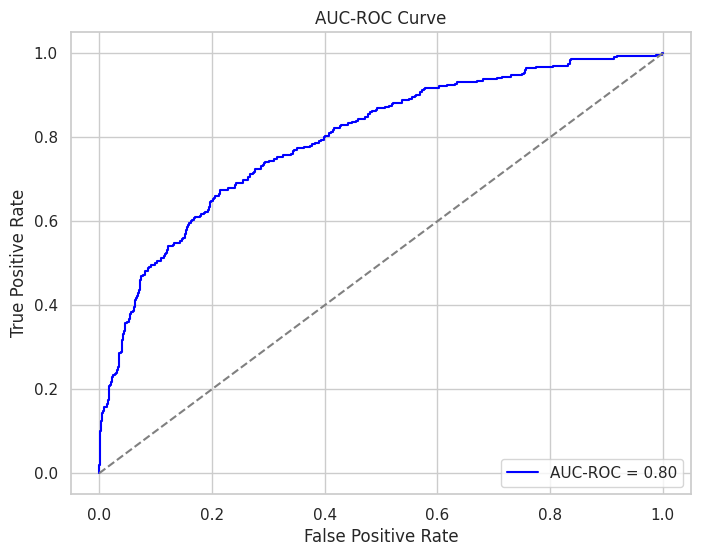

In [86]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC-ROC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random model line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc="lower right")
plt.show()


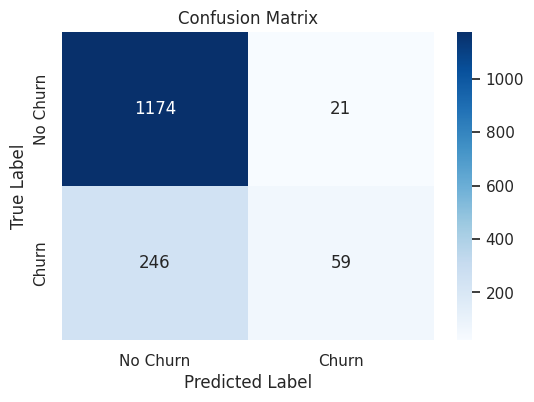


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      1195
           1       0.74      0.19      0.31       305

    accuracy                           0.82      1500
   macro avg       0.78      0.59      0.60      1500
weighted avg       0.81      0.82      0.78      1500



In [87]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
# Print detailed classification report
print("\n✅ Classification Report:\n", classification_report(y_test, y_test_pred))


<ipython-input-88-d2615c096cbc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="viridis")


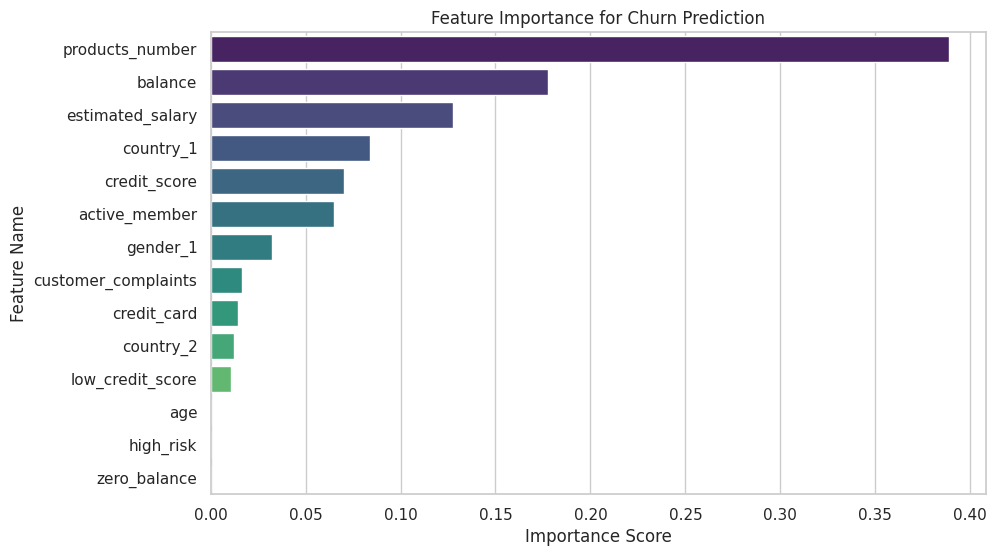


✅ Top 10 Features Driving Churn:
                Feature  Importance
3       products_number    0.388654
2               balance    0.177761
6      estimated_salary    0.127525
11            country_1    0.083999
0          credit_score    0.070147
5         active_member    0.064822
13             gender_1    0.032553
10  customer_complaints    0.016781
4           credit_card    0.014603
12            country_2    0.012532


In [88]:
# Extract feature importance (only for tree-based models like Random Forest, XGBoost, LightGBM)
feature_importance = best_rf_model.feature_importances_
# Convert to DataFrame
feat_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
# Sort by importance
feat_importance_df = feat_importance_df.sort_values(by="Importance", ascending=False)
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="viridis")
plt.title("Feature Importance for Churn Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()
# Print Top Features
print("\n✅ Top 10 Features Driving Churn:")
print(feat_importance_df.head(10))


In [89]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Upload dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
# Features & target
X = df.drop(columns=['churn'])
y = df['churn']
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Apply SMOTE
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)


Saving Processed_Customer_Churn.csv to Processed_Customer_Churn (3).csv


In [90]:
stack_model = StackingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
], final_estimator=LogisticRegression())

stack_model.fit(X_train_smote, y_train_smote)
y_test_prob_stack = stack_model.predict_proba(X_test)[:, 1]


In [91]:
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_smote, y_train_smote, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)
y_test_prob_nn = nn_model.predict(X_test).flatten()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [92]:
# Compute AUC-ROC scores
stack_auc = roc_auc_score(y_test, y_test_prob_stack)
nn_auc = roc_auc_score(y_test, y_test_prob_nn)
print(f"✅ Stacking AUC-ROC: {stack_auc:.2f}")
print(f"✅ Neural Network AUC-ROC: {nn_auc:.2f}")


✅ Stacking AUC-ROC: 0.76
✅ Neural Network AUC-ROC: 0.79
